## Figure 2.Accurate definition of core genome
A. Core genome sensitivity analysis  
B. Function analysis of core genome  
C. Pan-genome comparison between S.cerevisiae and yeast species  
D. Global comparison of gene copy number variation  
E. Global comparison of mean gene expression abundance and dispersion  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Set the working directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
# set figure parameters
# set the font size of the figure
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 1

axis_fontdict={'fontsize':8,'fontweight':'bold'}
label_fontdict={'fontsize':10,'fontweight':'bold'}
title_fontdict={'fontsize':12,'fontweight':'bold'}

colors_set=sns.color_palette('Dark2')

In [16]:
colors_set

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

### Figure 2A. Core genome sensitivity analysis

In [2]:
# load data
df_core_gene_numb=pd.read_csv(r'code/3.pan-genome_construction/3.pan-genome_comparison/output/sce_pan_structure_core_gene_number.csv',index_col=0)
df_core_gene_numb

,0.95,0.955,0.96,0.965,0.97,0.975,0.98,0.982,0.984,0.986,0.988,0.99,0.992,0.994,0.996,0.998,1.0
lg_core,5299,5276,5250,5221,5183,5145,5085,5045,4994,4968,4912,4851,4766,4678,4455,4078,3056
na_core,5816,5806,5792,5764,5746,5730,5703,5688,5598,5563,5530,5491,5435,5383,5320,5235,4942
this_core,5496,5467,5424,5378,5334,5276,5173,5108,5029,4963,4850,4766,4578,4260,3898,2902,939


d:\softwares\programming\anoconda\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\softwares\programming\anoconda\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


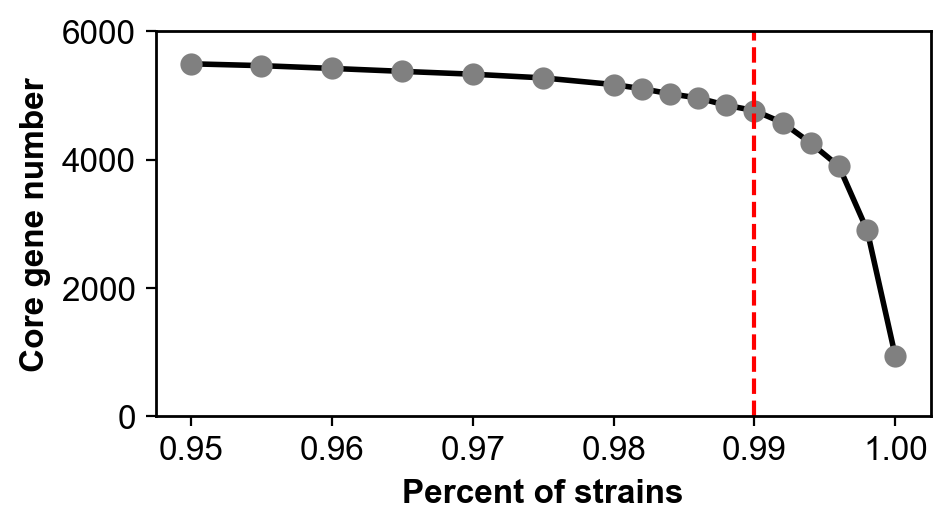

In [9]:
this_core_gene_numb=df_core_gene_numb.T['this_core']
# set float format for index
this_core_gene_numb.index=this_core_gene_numb.index.map(lambda x:float(x))

# plot line plot for this study pan-genome structure
fig,ax=plt.subplots(figsize=(5,2.5),dpi=200)
# plt.style.use('seaborn-paper')
# line color: black, maker color: grey , maker no edge
sns.lineplot(data=this_core_gene_numb,
             ax=ax,linewidth=2,
             marker='o',
             markersize=8,
             color='black',
             markerfacecolor='grey',
             markeredgecolor='none')
# set y axis label
ax.set_ylabel('Core gene number',fontdict=label_fontdict,fontsize=12)
ax.set_ylim(0,6000)
# set x axis label
ax.set_xlabel('Percent of strains',fontdict=label_fontdict,fontsize=12)
# ax.set_xlim(0.94,1)

# set ticks fontsize
ax.tick_params(axis='both',which='major',labelsize=12)
# plot a horizontal line: x=0.99
ax.axvline(x=0.99,linestyle='--',color='red',linewidth=1.5)
# set title,and set part of title in italic
# ax.set_title('Core genome sensitivity analysis for S.cerevisiae',fontdict=title_fontdict)


# save figure
plt.savefig(r'figures/output/figure2_core_sensitivity.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()


### Figure 2B. Functional comparison with Sce pan-genome from other study

In [4]:
# load data
df_core_cog_count=pd.read_csv(r'code/4.core genome_analysis/coregenome_compare_other_sce_core/output/3coregenome_compare_cog_counts.csv',index_col=0)
df_core_cog_count

# load COG category,set columns as "COG","category"
df_cog=pd.read_csv("data/cog_cotegory",index_col=0,sep="\t",header=None)
df_cog.columns=["color","description"]
df_cog=df_cog['description']
cog_list=[df_cog[i] for i in df_core_cog_count.index]

df_core_cog_count.index=cog_list
df_core_cog_count

,na1011_coregenome,lg1362_coregenome,this1800_coregenome
"Translation, ribosome biogenesis",326,326,329
RNA processing and modification,283,293,290
Transcription,413,436,424
DNA replication and repair,193,202,197
Chromatin structure and dynamics,84,80,78
"Cell cycle control,cell division",127,132,129
Nuclear structure,29,26,28
Defense mechanisms,17,20,18
Signal transduction mechanisms,238,244,232
Cell membrane biogenesis,34,31,32


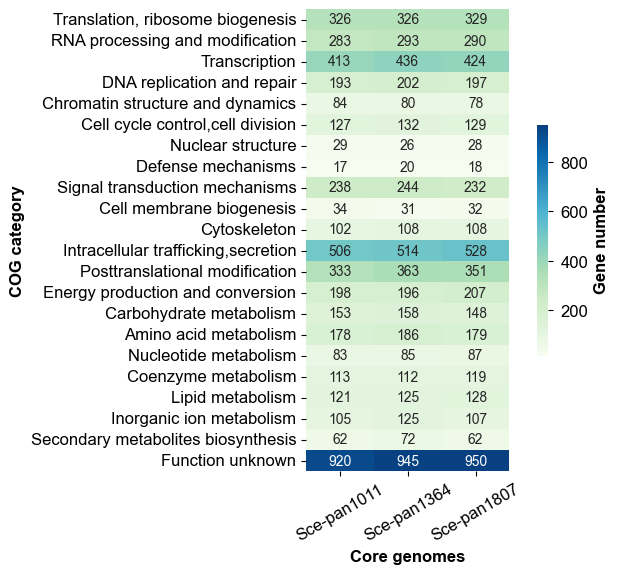

In [5]:
# plot heapmap for core genome COG counts comparison
fig,ax=plt.subplots(figsize=(3.5,6))
plt.style.use('seaborn-v0_8-paper')
# set color bar parameters
cbar_kws={'orientation':'vertical',
            'shrink':0.5,
            'aspect':20,
            'pad':0.1,
            'label':'COG counts',
            }
sns.heatmap(data=df_core_cog_count,
            annot=True,
            cmap='GnBu',
            fmt='d',
            cbar_kws=cbar_kws,
            ax=ax,
            )
            
# set x axis label
ax.set_xlabel('Core genomes',fontsize=12,fontweight='bold')
# set x tick label
ax.set_xticklabels(['Sce-pan1011','Sce-pan1364','Sce-pan1807'],fontsize=12,rotation=30)
# set y axis label
ax.set_ylabel('COG category',fontsize=12,fontdict=label_fontdict)
# set y tick label
ax.set_yticklabels(df_core_cog_count.index,fontsize=12)

# set cbar tick label font size and font weight
cbar=ax.collections[0].colorbar
cbar.set_label('Gene number',fontsize=12,fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# save figure
plt.savefig(r'figures/output/figure2_core_functional_compare.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

### Figure 2C. 7 yeast species pan-genome

||pan-genome size|core gene number|
|-|-|-|
|S.cerevisiae pan-genome|7514|4766|
|7 yeasts|9418|3144|


C:\Users\wangh\AppData\Local\Temp\ipykernel_31864\3529544312.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=30)


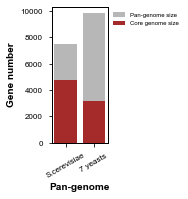

In [9]:
x=['S.cerevisiae','7 yeasts']
y_pan=[7514,9818]
y_core=[4766,3144]

# plot bar plot for pan-genome and core genome size comparison
fig,ax=plt.subplots(figsize=(1,2.5))
# plt.style.use('seaborn-paper')

# plot bar plot for pan-genome size,and set bar width
ax.bar(x=x,height=y_pan,width=0.8,color='#b7b7b7',label='Pan-genome size')
# plot bar plot for core genome size
ax.bar(x=x,height=y_core,color='#a52a2a',label='Core genome size',width=0.8)

# set y axis label
ax.set_ylabel('Gene number',fontdict=label_fontdict)
# ax.set_ylim(0,10000)
# set x axis label
ax.set_xlabel('Pan-genome',fontdict=label_fontdict)
# set axis tick label
ax.set_xticklabels(x,rotation=30)

# set legend outside the plot
ax.legend(fontsize=6,frameon=False,bbox_to_anchor=(1,1),loc='upper left')

plt.show()
# save figure
fig.savefig(r'figures/output/figure2_7yeasts_pan_core_size.svg',dpi=400,bbox_inches='tight',transparent=True)

### Figure 2D. Bubble chart to evaluate core genome evolution in yeast species

In [6]:
#load data
df_core_yeast7_sce_cog_count=pd.read_csv(r'code/4.core genome_analysis/compare_with_closed_yeasts/output/7yeasts_vs_sce1800_core_cog_counts.csv',index_col=0)
df_core_yeast7_sce_cog_count

,7 yeasts,S.cerevisiae 1800,7 yeasts core/sce core,cog description
B,68,78,0.871795,Chromatin structure and dynamics
P,93,107,0.869159,Inorganic ion metabolism
G,127,148,0.858108,Carbohydrate metabolism
M,27,32,0.843750,Cell membrane biogenesis
E,143,179,0.798883,Amino acid metabolism
V,14,18,0.777778,Defense mechanisms
I,98,128,0.765625,Lipid metabolism
T,177,232,0.762931,Signal transduction mechanisms
D,98,129,0.759690,"Cell cycle control,cell division"
Q,47,62,0.758065,Secondary metabolites biosynthesis


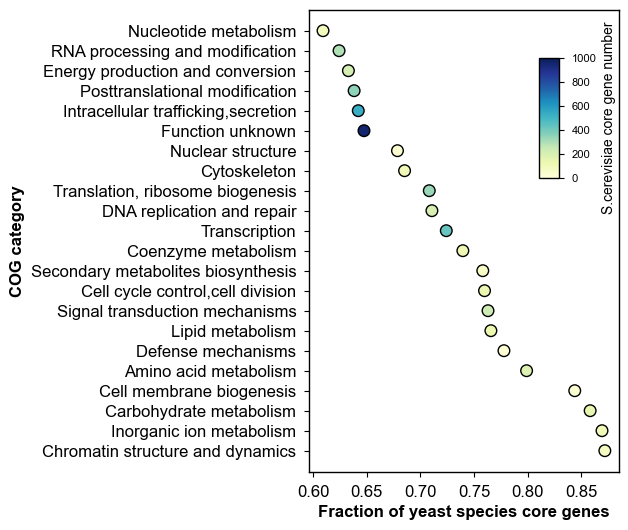

In [9]:
# plot bubble plot for different cog category, 7 yeasts core/sce core as y axis, S.cerevisiae 1800 as size, cog description as x axis
fig,ax=plt.subplots(figsize=(4,6),dpi=100)
# plt.style.use('seaborn-paper')

# set color bar parameters
cbar_kws={'orientation':'vertical',
            'shrink':0.5,
            'aspect':20,
            'pad':0.1
            }

st=ax.scatter(x=df_core_yeast7_sce_cog_count['7 yeasts core/sce core'],
           y=range(df_core_yeast7_sce_cog_count.shape[0]),
            s=70,
            linewidths=1,
            c=df_core_yeast7_sce_cog_count['S.cerevisiae 1800'],
            # set color map
            cmap='YlGnBu',
            vmax=1000,
            vmin=0,
            edgecolors='black',
            )
# set y axis label
ax.set_ylabel('COG category',fontsize=12,fontdict=label_fontdict)
# set y axis tick label
ax.set_yticks(range(df_core_yeast7_sce_cog_count.shape[0]))
ax.set_yticklabels(df_core_yeast7_sce_cog_count['cog description'],fontsize=12)
# set x axis label
ax.set_xlabel('Fraction of yeast species core genes',fontsize=12,fontdict=label_fontdict)
# set x axis tick font size
ax.tick_params(axis='x',labelsize=12)


# add color bar,and set it inside the plot
cax=fig.add_axes([0.7,0.6,0.05,0.2],)
cb=fig.colorbar(st,shrink=0.1,cax=cax,orientation='vertical',label='S.cerevisiae core gene number',ticks=[0,200,400,600,800,1000])
# set the colorbar label font size
cb.set_label(label='S.cerevisiae core gene number',fontsize=10)
# set part pf colorbar label as italic

# set title
# ax.set_title('Conservation analysis of the yeast core genome',fontdict=title_fontdict)

# save result
plt.savefig(r'figures/output/figure2_yeasts_core_conservation.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

### Figure 2E. Core genome CNV comparison

In [10]:
# load cnv data
df_sce_cnv_info=pd.read_csv(r'code/4.core genome_analysis/compare_with_closed_yeasts/output/sce1800_cnv_info.csv',index_col=0)

df_scecore_yeastcore_cnv_info=df_sce_cnv_info[df_sce_cnv_info['type']=='yeast_core']
df_scecore_nonyeast_cnv_info=df_sce_cnv_info[df_sce_cnv_info['type']=='sce_core']
df_sce_accessory_cnv_info=df_sce_cnv_info[df_sce_cnv_info['type']=='accessory']
df_scecore_cnv_info=df_sce_cnv_info[df_sce_cnv_info['type']!='accessory']
print('yeast core gene number:',df_scecore_yeastcore_cnv_info.shape[0])
print('non yeast core gene number:',df_scecore_nonyeast_cnv_info.shape[0])
print('sce accessory gene number:',df_sce_accessory_cnv_info.shape[0])
print('sce core gene number:',df_scecore_cnv_info.shape[0])
df_scecore_cnv_info

yeast core gene number: 2819
non yeast core gene number: 1947
sce accessory gene number: 2748
sce core gene number: 4766


,mean,std,cv,dispersion,type
YAL001C,1.004986,0.084743,0.084322,0.009934,yeast_core
YAL002W,1.005003,0.084884,0.084461,0.009967,yeast_core
YAL003W,1.004459,0.081687,0.081325,0.008889,yeast_core
YAL008W,1.015573,0.155700,0.153313,0.030799,sce_core
YAL009W,1.016066,0.160608,0.158068,0.031777,yeast_core
...,...,...,...,...,...
YDR046C,1.025598,0.206819,0.201657,0.050342,yeast_core
YCR005C,1.041043,0.267519,0.256972,0.079855,yeast_core
YIL009W,1.018344,0.177102,0.173912,0.036259,sce_core
YBR145W,1.048253,0.304245,0.290240,0.093669,sce_core


In [11]:
print('core genome mean gene copy number:%s'%df_sce_cnv_info[df_sce_cnv_info['type']!='accessory']['mean'].mean())
print('accessory genome mean gene copy number:%s'%df_sce_cnv_info[df_sce_cnv_info['type']=='accessory']['mean'].mean())
print('core genome variation of cv:%s'%df_sce_cnv_info[df_sce_cnv_info['type']!='accessory']['cv'].mean())
print('accessory genome variation of cv:%s'%df_sce_cnv_info[df_sce_cnv_info['type']=='accessory']['cv'].mean())

print('yeast core mean gene copy number:%s'%df_sce_cnv_info[df_sce_cnv_info['type']=='yeast_core']['mean'].mean())
print('non-yeast core mean gene copy number:%s'%df_sce_cnv_info[df_sce_cnv_info['type']=='sce_core']['mean'].mean())
print('yeast core genome variation of cv:%s'%df_sce_cnv_info[df_sce_cnv_info['type']=='yeast_core']['cv'].mean())
print('non-yeast core genome variation of cv:%s'%df_sce_cnv_info[df_sce_cnv_info['type']=='sce_core']['cv'].mean())

core genome mean gene copy number:1.049207506688225
accessory genome mean gene copy number:1.0923273036828776
core genome variation of cv:0.16982196473581712
accessory genome variation of cv:0.13247206113615695
yeast core mean gene copy number:1.0404657062844318
non-yeast core mean gene copy number:1.0618644842631053
yeast core genome variation of cv:0.17344816513253275
non-yeast core genome variation of cv:0.16457170334992022


C:\Users\wangh\AppData\Local\Temp\ipykernel_36820\1632941350.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Yeast core','Non yeast core'],fontsize=12,fontweight='bold',rotation=15)


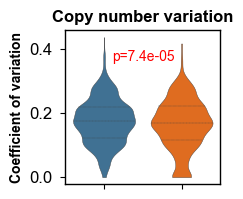

In [18]:
# calculate the p value of yeast core genes and non yeast core genes
p_yeastcore_nonyeast=stats.ttest_ind(df_scecore_yeastcore_cnv_info['cv'],df_scecore_nonyeast_cnv_info['cv'],equal_var=False)[1]

# plot violin plot to compare the mean copy number of yeast core genes and non yeast core genes
fig,ax=plt.subplots(figsize=(2,2),dpi=100)
# plt.style.use('seaborn-v0_8-deep')
# plot violin plot for yeast core genes and non yeast core genes
# sns.violinplot(data=[df_scecore_yeastcore_cnv_info['cv'],df_scecore_nonyeast_cnv_info['cv']],cut=0,ax=ax,inner='quartile',palette=['#3274a1','#e1812c'])
df=pd.DataFrame({'yeast core':df_scecore_yeastcore_cnv_info['cv'],'non-yeast core':df_scecore_nonyeast_cnv_info['cv']})
sns.violinplot(data=df,cut=0,ax=ax,inner='quartile',palette=['#3274a1','#ff6600'])
# print p value
ax.text(x=0.3,y=0.8,s='p='+str(round(p_yeastcore_nonyeast,6)),transform=ax.transAxes,fontsize=10,color='red')
# set y axis label
ax.set_ylabel('Coefficient of variation',fontweight='bold',fontsize=10)
# set x axis label
# ax.set_xlabel('Core genes',fontweight='bold',fontsize=8)
# set x axis tick label
ax.set_xticklabels(['Yeast core','Non yeast core'],fontsize=12,fontweight='bold',rotation=15)
ax.set_xticklabels([])
# set y tick and set fontsize
ax.set_yticks(np.arange(0,0.5,0.2))
ax.set_yticklabels(np.arange(0,0.5,0.2),fontsize=12)

# set title
ax.set_title('Copy number variation',fontweight='bold',fontsize=12)
plt.show()
# save result
# fig.savefig(r'figures/output/figure2_core_cnv.svg',dpi=400,bbox_inches='tight',transparent=True)

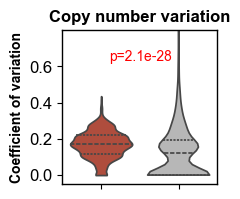

In [84]:
# calculate the p value of sce core and accessory genes
p_scecore_accessory=stats.ttest_ind(df_scecore_cnv_info['cv'],df_sce_accessory_cnv_info['cv'],equal_var=False)[1]

# plot violin plot to compare the mean copy number of yeast core genes and non yeast core genes
fig,ax=plt.subplots(figsize=(2,2),dpi=100)
# plt.style.use('seaborn-paper')
# plot violin plot for yeast core genes
# sns.violinplot(data=[df_scecore_cnv_info['cv'],df_sce_accessory_cnv_info['cv']],cut=0,ax=ax,inner='quartile',palette=['#c2402a','#b7b7b7'])
df=pd.DataFrame({'core':df_scecore_cnv_info['cv'],'accessory':df_sce_accessory_cnv_info['cv']})
sns.violinplot(data=df,cut=0,ax=ax,inner='quartile',palette=['#c2402a','#b7b7b7'])
# print p value
ax.text(x=0.3,y=0.8,s='p='+str(round(p_scecore_accessory,29)),transform=ax.transAxes,fontsize=10,color='red')
# set y axis label
ax.set_ylabel('Coefficient of variation',fontweight='bold',fontsize=10)
# set x axis tick label
# ax.set_xticklabels(['Core','Accessory'],fontsize=12,fontweight='bold',rotation=15)
# set a tick as non
ax.set_xticklabels([])
# set y limi
ax.set_ylim(-0.05,0.8)
ax.set_yticks(np.arange(0,0.8,0.2))
ax.set_yticklabels(np.arange(0,0.8,0.2).round(2),fontsize=12)
# set title
ax.set_title('Copy number variation',fontweight='bold',fontsize=12)
plt.show()
# save result
fig.savefig(r'figures/output/figure2_pan_cnv.svg',dpi=400,bbox_inches='tight',transparent=True)


### supplymentary2 mean gene copy number comparision：core vs accessory; Yeast core vs Non-yeast

p value of yeast core vs non yeast core: 0.0007794208551875548
p value of sce core vs accessory: 3.0750941873383513e-06


C:\Users\wangh\AppData\Local\Temp\ipykernel_28204\841702254.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_scecore_yeastcore_cnv_info['mean'],ax=ax,shade=True,color=colors_set[0],label='Yeast core',linewidth=linewidth)
C:\Users\wangh\AppData\Local\Temp\ipykernel_28204\841702254.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_scecore_nonyeast_cnv_info['mean'],ax=ax,shade=True,color=colors_set[1],label='Sce specific core',linewidth=linewidth)
C:\Users\wangh\AppData\Local\Temp\ipykernel_28204\841702254.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sce_accessory_cnv_info['mean'],ax=a

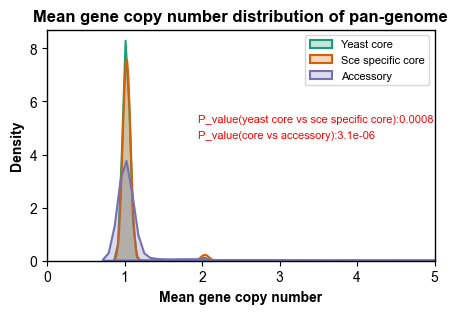

In [10]:
# calculate the p value of yeast core vs non yeast core, sce core vs accessory
p_yeastcore_nonyeast=stats.ttest_ind(df_scecore_yeastcore_cnv_info['mean'],df_scecore_nonyeast_cnv_info['mean'],equal_var=False)[1]
p_scecore_accessory=stats.ttest_ind(df_scecore_cnv_info['mean'],df_sce_accessory_cnv_info['mean'],equal_var=False)[1]
print('p value of yeast core vs non yeast core:',p_yeastcore_nonyeast)
print('p value of sce core vs accessory:',p_scecore_accessory)

# plot kde plot for yeast core,non yeast core and accessory genes
fig,ax=plt.subplots(figsize=(5,3),dpi=100)
# plt.style.use('seaborn-paper')
linewidth=1.5
# plot kde plot for yeast core genes
sns.kdeplot(data=df_scecore_yeastcore_cnv_info['mean'],ax=ax,shade=True,color=colors_set[0],label='Yeast core',linewidth=linewidth)
# plot kde plot for non yeast core genes
sns.kdeplot(data=df_scecore_nonyeast_cnv_info['mean'],ax=ax,shade=True,color=colors_set[1],label='Sce specific core',linewidth=linewidth)
# plot kde plot for accessory genes
sns.kdeplot(data=df_sce_accessory_cnv_info['mean'],ax=ax,shade=True,color=colors_set[2],label='Accessory',linewidth=linewidth)


# print p value
ax.text(x=0.39,y=0.6,s='P_value(yeast core vs sce specific core):'+str(round(p_yeastcore_nonyeast,4)),transform=ax.transAxes,fontsize=8,color='red')
ax.text(x=0.39,y=0.53,s='P_value(core vs accessory):'+str(round(p_scecore_accessory,7)),transform=ax.transAxes,fontsize=8,color='red')

# set x axis label
ax.set_xlabel('Mean gene copy number',fontdict=label_fontdict)
# set y axis label
ax.set_ylabel('Density',fontdict=label_fontdict)
# set title
ax.set_title('Mean gene copy number distribution of pan-genome',fontdict=title_fontdict)
# set legend
ax.legend(fontsize=8)
# set xlim
ax.set_xlim(0,5)
plt.show()
# save result
fig.savefig(r'figures/output/supplymentary2_pan_mean_cnv.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_28204\1881707632.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Yeast core','Sce specific core'],fontweight='bold',fontsize=12)


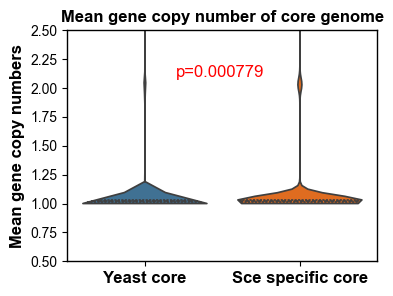

In [12]:
# calculate the p value of yeast core genes and non yeast core genes
p_yeastcore_nonyeast=stats.ttest_ind(df_scecore_yeastcore_cnv_info['mean'],df_scecore_nonyeast_cnv_info['mean'],equal_var=False)[1]

# plot violin plot to compare the mean copy number of yeast core genes and non yeast core genes
fig,ax=plt.subplots(figsize=(4,3),dpi=100)
# plt.style.use('seaborn-paper')
# plot violin plot for yeast core genes
# sns.violinplot(data=[df_scecore_yeastcore_cnv_info['mean'],df_scecore_nonyeast_cnv_info['mean']],cut=0,ax=ax,inner='quartile',palette=['#3274a1','#e1812c'])
df=pd.DataFrame({'yeast core':df_scecore_yeastcore_cnv_info['mean'],'non-yeast core':df_scecore_nonyeast_cnv_info['mean']})
sns.violinplot(data=df,cut=0,ax=ax,inner='quartile',palette=['#3274a1','#ff6600'])

# set y lim
ax.set_ylim(0.5,2.5)
# print p value
ax.text(x=0.35,y=0.8,s='p='+str(round(p_yeastcore_nonyeast,6)),transform=ax.transAxes,fontsize=12,color='red')
# set y axis label
ax.set_ylabel('Mean gene copy numbers',fontweight='bold',fontsize=12)
# set x axis label
# ax.set_xlabel('Core genes',fontweight='bold',fontsize=8)
# set x axis tick label
ax.set_xticklabels(['Yeast core','Sce specific core'],fontweight='bold',fontsize=12)
# set title
ax.set_title('Mean gene copy number of core genome',fontweight='bold',fontsize=12)
plt.show()
# save result
fig.savefig(r'figures/output/additional2_core_cn_mean.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_24424\768191510.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Core','Accessory'],fontsize=12,fontweight='bold')


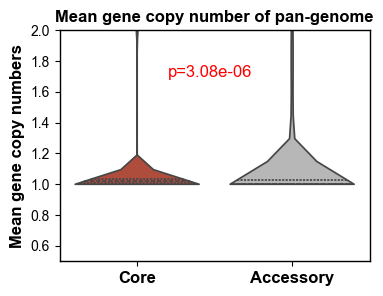

In [111]:
# calculate the p value of sce core and accessory genes
p_scecore_accessory=stats.ttest_ind(df_scecore_cnv_info['mean'],df_sce_accessory_cnv_info['mean'],equal_var=False)[1]

# plot violin plot to compare the mean copy number of yeast core genes and non yeast core genes
fig,ax=plt.subplots(figsize=(4,3),dpi=100)
# plt.style.use('seaborn-paper')
# plot violin plot for yeast core genes
# sns.violinplot(data=[df_scecore_cnv_info['mean'],df_sce_accessory_cnv_info['mean']],cut=0,ax=ax,inner='quartile',palette=['#c2402a','#b7b7b7'])
df=pd.DataFrame({'core':df_scecore_cnv_info['mean'],'accessory':df_sce_accessory_cnv_info['mean']})
sns.violinplot(data=df,cut=0,ax=ax,inner='quartile',palette=['#c2402a','#b7b7b7'])
# print p value
ax.text(x=0.35,y=0.8,s='p='+str(round(p_scecore_accessory,8)),transform=ax.transAxes,fontsize=12,color='red')
# set y axis label
ax.set_ylabel('Mean gene copy numbers',fontweight='bold',fontsize=12)
# set x axis tick label
ax.set_xticklabels(['Core','Accessory'],fontsize=12,fontweight='bold')
# set y limi
ax.set_ylim(0.5,2)
# set title
ax.set_title('Mean gene copy number of pan-genome',fontweight='bold',fontsize=12)
plt.show()
# save result
fig.savefig(r'figures/output/additional2_pan_cn_mean.svg',dpi=400,bbox_inches='tight',transparent=True)

### Figure 2F. pan-genome mRNA abundance and variation

In [13]:
# load data
df_sce_tpm_info=pd.read_csv(r'code/4.core genome_analysis/compare_with_closed_yeasts/output/sce969_tpm_info.csv',index_col=0)
df_sce_tpm_info

,mean,std,cv,dispersion,type
re3,,,,,
YNL201C,4.908680,0.370872,0.075554,0.284657,yeast_core
YGR040W,5.067880,0.461341,0.091032,0.358205,yeast_core
YKR007W,6.661513,0.303227,0.045519,0.235590,sce_core
YDR366C,2.182184,0.979330,0.448785,0.716361,accessory
YMR069W,2.950679,0.577180,0.195609,0.450159,accessory
...,...,...,...,...,...
YPR178W,4.809399,0.293739,0.061076,0.231202,yeast_core
YNL215W,6.795173,0.271306,0.039926,0.213423,sce_core
YDR456W,5.516324,0.347755,0.063041,0.267586,yeast_core


In [86]:
df_sce_accessory_tpm_info=df_sce_tpm_info[df_sce_tpm_info['type']=='accessory']
df_scecore_tpm_info=df_sce_tpm_info[df_sce_tpm_info['type']!='accessory']
print('sce accessory gene number:',df_sce_accessory_tpm_info.shape[0])
print('sce core gene number:',df_scecore_tpm_info.shape[0])

sce accessory gene number: 1803
sce core gene number: 4651


In [87]:
print('core genome mean gene expression:%s'%df_sce_tpm_info[df_sce_tpm_info['type']!='accessory']['mean'].mean())
print('accessory genome mean gene expression:%s'%df_sce_tpm_info[df_sce_tpm_info['type']=='accessory']['mean'].mean())
print('core genome variation of gene expression:%s'%df_sce_tpm_info[df_sce_tpm_info['type']!='accessory']['cv'].mean())
print('accessory genome variation of gene expression:%s'%df_sce_tpm_info[df_sce_tpm_info['type']=='accessory']['cv'].mean())

print('yeast core mean gene expression:%s'%df_sce_tpm_info[df_sce_tpm_info['type']=='yeast_core']['mean'].mean())
print('non-yeast core mean gene gene expression:%s'%df_sce_tpm_info[df_sce_tpm_info['type']=='sce_core']['mean'].mean())
print('yeast core genome variation of gene expression:%s'%df_sce_tpm_info[df_sce_tpm_info['type']=='yeast_core']['cv'].mean())
print('non-yeast core genome variation of gene expression:%s'%df_sce_tpm_info[df_sce_tpm_info['type']=='sce_core']['cv'].mean())

core genome mean gene expression:5.965866267420252
accessory genome mean gene expression:4.884688836831205
core genome variation of gene expression:0.09140228875790254
accessory genome variation of gene expression:0.20543061984307995
yeast core mean gene expression:6.068496360894542
non-yeast core mean gene gene expression:5.81005967180471
yeast core genome variation of gene expression:0.08630540412773648
non-yeast core genome variation of gene expression:0.0991400605516143


p value of sce core vs accessory: 6.595978750246942e-73


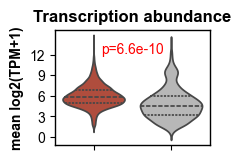

In [88]:
# calculate the p value of sce core and accessory genes
p_scecore_accessory=stats.ttest_ind(df_scecore_tpm_info['mean'],df_sce_accessory_tpm_info['mean'],equal_var=False)[1]
print('p value of sce core vs accessory:',p_scecore_accessory)
# plot violin plot to compare the mean mRNA abundance of core and accessory genes
fig,ax=plt.subplots(figsize=(2,1.5),dpi=100)
# plt.style.use('seaborn-paper')
# plot violin plot for yeast core genes
# sns.violinplot(data=[df_scecore_tpm_info['mean'],df_sce_accessory_tpm_info['mean']],ax=ax,inner='quartile',palette=['#c2402a','#b7b7b7'])
df=pd.DataFrame({'core':df_scecore_tpm_info['mean'],'accessory':df_sce_accessory_tpm_info['mean']})
sns.violinplot(data=df,ax=ax,inner='quartile',palette=['#c2402a','#b7b7b7'])
# set y axis label
ax.set_ylabel('mean log2(TPM+1)',fontweight='bold',fontsize=10)
# set x axis tick label
ax.set_xticklabels([])

# set y tick
ax.set_yticks(np.arange(0,15,3))
ax.set_yticklabels(np.arange(0,15,3).round(2),fontsize=10)
# print p value
ax.text(x=0.3,y=0.8,s='p=6.6e-10',transform=ax.transAxes,fontsize=10,color='red')

# set title
ax.set_title('Transcription abundance',fontweight='bold',fontsize=12)
plt.show()
# save result
fig.savefig(r'figures/output/figure2_pan_tpm_mean.svg',dpi=400,bbox_inches='tight',transparent=True)

p value of sce core vs accessory: 2.1389747623911013e-190


C:\Users\wangh\AppData\Local\Temp\ipykernel_24424\2923400878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Core','Accessory'],fontsize=12,fontweight='bold',rotation=15)


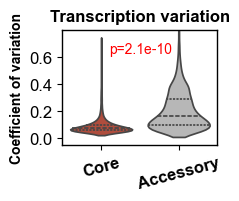

In [89]:
# calculate the p value of sce core and accessory genes
p_scecore_accessory=stats.ttest_ind(df_scecore_tpm_info['cv'],df_sce_accessory_tpm_info['cv'],equal_var=False)[1]
print('p value of sce core vs accessory:',p_scecore_accessory)

# plot violin plot to compare the variation of core and accessory genes
fig,ax=plt.subplots(figsize=(2,1.5),dpi=100)
# plt.style.use('seaborn-paper')
# plot violin plot for yeast core genes
# sns.violinplot(data=[df_scecore_tpm_info['cv'],df_sce_accessory_tpm_info['cv']],ax=ax,inner='quartile',cut=0,palette=['#c2402a','#b7b7b7'])
df=pd.DataFrame({'core':df_scecore_tpm_info['cv'],'accessory':df_sce_accessory_tpm_info['cv']})
sns.violinplot(data=df,ax=ax,inner='quartile',cut=0,palette=['#c2402a','#b7b7b7'])
# set y axis label
ax.set_ylabel('Coefficient of variation',fontweight='bold',fontsize=10)
# set x axis tick label
ax.set_xticklabels(['Core','Accessory'],fontsize=12,fontweight='bold',rotation=15)

# print p value
ax.text(x=0.3,y=0.8,s='p=2.1e-10',transform=ax.transAxes,fontsize=10,color='red')

# set ylim
ax.set_ylim(-0.05,0.8)
# set y tick
ax.set_yticks(np.arange(0,0.8,0.2))
ax.set_yticklabels(np.arange(0,0.8,0.2).round(2),fontsize=12)

# set title
ax.set_title('Transcription variation',fontweight='bold',fontsize=12)
plt.show()
# save result
fig.savefig(r'figures/output/figure2_pan_tpm_cv.svg',dpi=400,bbox_inches='tight',transparent=True)

### Figure 2G.Core genome transcription abundace and variation

In [14]:
df_scecore_yeastcore_tpm_info=df_sce_tpm_info[df_sce_tpm_info['type']=='yeast_core']
df_scecore_nonyeast_tpm_info=df_sce_tpm_info[df_sce_tpm_info['type']=='sce_core']
print('yeast core gene number:',df_scecore_yeastcore_tpm_info.shape[0])
print('non yeast core gene number:',df_scecore_nonyeast_tpm_info.shape[0])

yeast core gene number: 2804
non yeast core gene number: 1847


mean of yeast core: 6.068496360894542
mean of non yeast core: 5.81005967180471
p value of yeast core vs non yeast core: 1.0673621671731598e-07


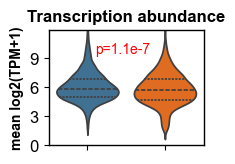

In [92]:
# calculate the p value of yeast core and non yeast core genes
print('mean of yeast core:',df_scecore_yeastcore_tpm_info['mean'].mean())
print('mean of non yeast core:',df_scecore_nonyeast_tpm_info['mean'].mean())
p_yeastcore_nonyeast=stats.ttest_ind(df_scecore_yeastcore_tpm_info['mean'],df_scecore_nonyeast_tpm_info['mean'],equal_var=False)[1]
print('p value of yeast core vs non yeast core:',p_yeastcore_nonyeast)
# plot violin plot to compare the mean mRNA abundance of yeast core and non yeast core genes
fig,ax=plt.subplots(figsize=(2,1.5),dpi=100)
# plt.style.use('seaborn-paper')
# plot violin plot for yeast core genes
# sns.violinplot(data=[df_scecore_yeastcore_tpm_info['mean'],df_scecore_nonyeast_tpm_info['mean']],ax=ax,inner='quartile',palette=['#3274a1','#e1812c'])
df=pd.DataFrame({'yeast core':df_scecore_yeastcore_tpm_info['mean'],'non yeast core':df_scecore_nonyeast_tpm_info['mean']})
sns.violinplot(data=df,ax=ax,inner='quartile',palette=['#3274a1','#ff6600'])
# set y axis label
ax.set_ylabel('mean log2(TPM+1)',fontweight='bold',fontsize=10)
# set x axis tick label
ax.set_xticklabels([])

# print p value
ax.text(x=0.3,y=0.8,s='p=1.1e-7',transform=ax.transAxes,fontsize=10,color='red')

# set ylim
ax.set_ylim(0,12)
# set y tick
ax.set_yticks(np.arange(0,12,3))
ax.set_yticklabels(np.arange(0,12,3),fontsize=12)
# set title
ax.set_title('Transcription abundance',fontweight='bold',fontsize=12)
plt.show()
# save result
fig.savefig(r'figures/output/figure2_core_tpm_mean.svg',dpi=400,bbox_inches='tight',transparent=True)

mean cv of yeast core: 0.08630540412773648
mean cv of non yeast core: 0.0991400605516143
p value of yeast core vs non yeast core: 1.695311420296225e-10


C:\Users\wangh\AppData\Local\Temp\ipykernel_28204\1928356856.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Yeast core','Sce specific core'],fontweight='bold',fontsize=12,rotation=15)


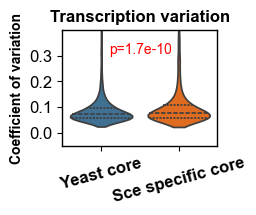

In [16]:
# calculate the p value of yeast core and non yeast core genes
print('mean cv of yeast core:',df_scecore_yeastcore_tpm_info['cv'].mean())
print('mean cv of non yeast core:',df_scecore_nonyeast_tpm_info['cv'].mean())
p_yeastcore_nonyeast=stats.ttest_ind(df_scecore_yeastcore_tpm_info['cv'],df_scecore_nonyeast_tpm_info['cv'],equal_var=False)[1]
print('p value of yeast core vs non yeast core:',p_yeastcore_nonyeast)

# plot violin plot to compare the variation of core and accessory genes
fig,ax=plt.subplots(figsize=(2,1.5),dpi=100)
# plt.style.use('seaborn-paper')
# plot violin plot for yeast core genes
# sns.violinplot(data=[df_scecore_yeastcore_tpm_info['cv'],df_scecore_nonyeast_tpm_info['cv']],ax=ax,inner='quartile',cut=0,palette=['#3274a1','#e1812c'])
df=pd.DataFrame({'yeast core':df_scecore_yeastcore_tpm_info['cv'],'non yeast core':df_scecore_nonyeast_tpm_info['cv']})
sns.violinplot(data=df,ax=ax,inner='quartile',cut=0,palette=['#3274a1','#ff6600'])
# set y axis label
ax.set_ylabel('Coefficient of variation',fontweight='bold',fontsize=10)
# set x axis tick label
ax.set_xticklabels(['Yeast core','Sce specific core'],fontweight='bold',fontsize=12,rotation=15)

# print p value
ax.text(x=0.3,y=0.8,s='p=1.7e-10',transform=ax.transAxes,fontsize=10,color='red')

# set ylim
ax.set_ylim(-0.05,0.4)
# set y tick
ax.set_yticks(np.arange(0,0.4,0.1))
ax.set_yticklabels(np.arange(0,0.4,0.1).round(1),fontsize=12)

# set title
ax.set_title('Transcription variation',fontweight='bold',fontsize=12)
plt.show()
# save result
fig.savefig(r'figures/output/figure2_core_tpm_cv.svg',dpi=400,bbox_inches='tight',transparent=True)

- additional figure. core genes functional comparison: Yeast-pan core genes vs Sce-pan1800 core genes

In [112]:
df_core_yeast7_sce_cog_count

,7 yeasts,S.cerevisiae 1800,7 yeasts core/sce core,cog description
B,68,78,0.871795,Chromatin structure and dynamics
P,93,107,0.869159,Inorganic ion metabolism
G,127,148,0.858108,Carbohydrate metabolism
M,27,32,0.843750,Cell membrane biogenesis
E,143,179,0.798883,Amino acid metabolism
V,14,18,0.777778,Defense mechanisms
I,98,128,0.765625,Lipid metabolism
T,177,232,0.762931,Signal transduction mechanisms
D,98,129,0.759690,"Cell cycle control,cell division"
Q,47,62,0.758065,Secondary metabolites biosynthesis


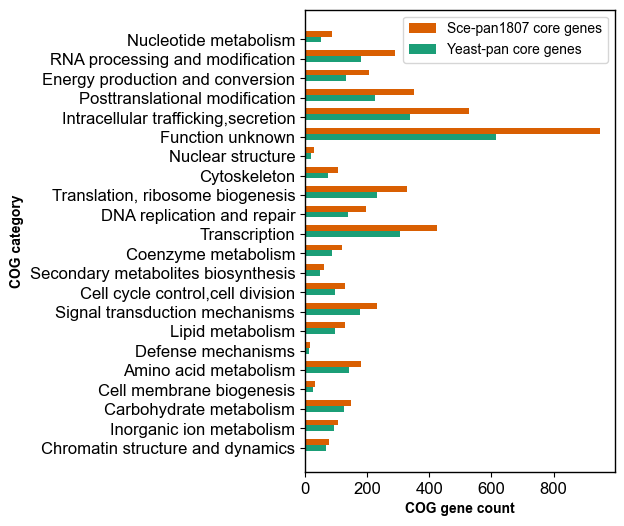

In [119]:
# plot grouped barplot to compare COG gene count in each COG category for 3 pangenome
fig,ax=plt.subplots(figsize=(4,6),dpi=100)
# plt.style.use('seaborn-paper')

bar_width = 0.3
index=np.arange(len(df_core_yeast7_sce_cog_count))
plt.barh(index+bar_width,df_core_yeast7_sce_cog_count["S.cerevisiae 1800"],bar_width,label="Sce-pan1807 core genes",color=colors_set[1])
plt.barh(index,df_core_yeast7_sce_cog_count["7 yeasts"],bar_width,label="Yeast-pan core genes",color=colors_set[0])
# plt.bar(index+bar_width*2,df_cog_counts["common core"],bar_width,label="common core genes(%s)"%len(common_core))
plt.ylabel('COG category',fontdict=label_fontdict)
plt.xlabel('COG gene count',fontdict=label_fontdict)
cog_description=df_core_yeast7_sce_cog_count['cog description'].tolist()
plt.yticks(index, cog_description,fontsize=12)
# set x tick
ax.tick_params(axis='x',labelsize=12)
# plt.xticks(np.arange(0,120,20),fontsize=12)
plt.legend()
plt.show()
fig.savefig(r'figures/output/additional2_yeast_sce_core_func.svg',dpi=400,bbox_inches='tight',transparent=True)